In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Load the CSV file
# Make sure the 'hospital_data.csv' file is in your working directory
df = pd.read_csv('bed_occupancy.csv')
df.head()


,Date,Hospital ID,Total Beds,Available Beds,Patient Admissions,Patient Discharges,Critical Patients,Emergency Admissions,Scheduled Surgeries,Infection Rate,Avg Length of Stay (days)
0,1/1/2023,HOSP001,150,40,120,100,30,20,15,0.05,5.0
1,1/2/2023,HOSP001,150,38,125,95,28,18,12,0.06,4.8
2,1/3/2023,HOSP001,150,35,130,90,32,22,10,0.07,5.1
3,1/4/2023,HOSP001,150,30,135,85,35,25,18,0.08,5.2
4,1/5/2023,HOSP001,150,28,140,80,33,30,20,0.07,5.0


Dataset Overview:
        Date Hospital ID  Total Beds  Available Beds  Patient Admissions  \
0  1/1/2023     HOSP001         150              40                 120   
1  1/2/2023     HOSP001         150              38                 125   
2  1/3/2023     HOSP001         150              35                 130   
3  1/4/2023     HOSP001         150              30                 135   
4  1/5/2023     HOSP001         150              28                 140   

   Patient Discharges  Critical Patients  Emergency Admissions  \
0                 100                 30                    20   
1                  95                 28                    18   
2                  90                 32                    22   
3                  85                 35                    25   
4                  80                 33                    30   

   Scheduled Surgeries  Infection Rate  Avg Length of Stay (days)  
0                   15            0.05                        5.0

C:\Users\1mscds49\AppData\Local\Temp\ipykernel_17404\2308227858.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


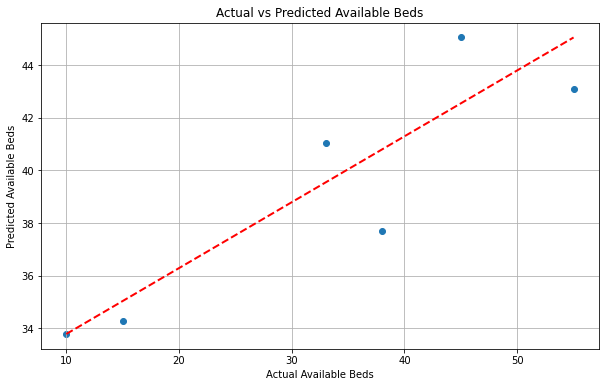


Model Coefficients and Intercept:
Intercept: 44.16439322888805
Coefficients: [-0.09776441 -0.79070778  1.18107868]


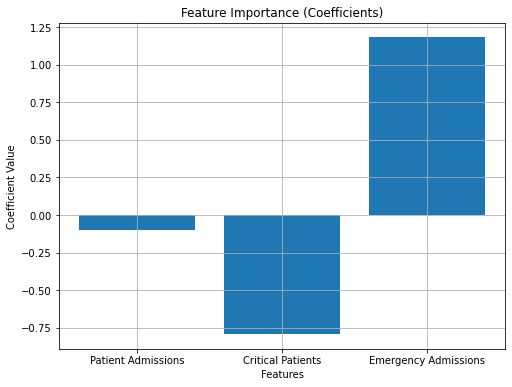


Predicted Available Beds for new data (150 Patient Admissions, 60 Critical Patients, 45 Emergency Admissions): 35.205805087898014


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [3]:
# Display the first few rows of the dataset to inspect
print("Dataset Overview:\n", df.head())

# Step 2: Data Preprocessing
# Checking for missing values
print("\nMissing values:\n", df.isnull().sum())

# If there are any missing values, fill them with the mean of the respective column
df.fillna(df.mean(), inplace=True)

# Step 3: Feature Selection
# Let's select the relevant features and the target variable (Available Beds)
X = df[["Patient Admissions", "Critical Patients", "Emergency Admissions"]]  # Features
y = df["Available Beds"]  # Target variable

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict on the test set
y_pred = model.predict(X_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error: {mse}")

# Step 8: Plotting the Results
# Plotting the predicted vs actual available beds
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', lw=2, linestyle='--')
plt.title('Actual vs Predicted Available Beds')
plt.xlabel('Actual Available Beds')
plt.ylabel('Predicted Available Beds')
plt.grid(True)
plt.show()

# Step 9: Coefficients and Intercept
print("\nModel Coefficients and Intercept:")
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Optional: Visualizing the coefficients of the features
plt.figure(figsize=(8, 6))
plt.bar(X.columns, model.coef_)
plt.title('Feature Importance (Coefficients)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

# Step 10: Additional Prediction for New Data (optional)
# Example: Predict Available Beds for a new entry (e.g., 150 Patient Admissions, 60 Critical Patients, 45 Emergency Admissions)
new_data = np.array([[150, 60, 45]])
predicted_beds = model.predict(new_data)
print(f"\nPredicted Available Beds for new data (150 Patient Admissions, 60 Critical Patients, 45 Emergency Admissions): {predicted_beds[0]}")
